In [136]:
import numpy as np
import pandas as pd
import pyodbc
import sqlite3
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler 
from scipy.stats import rv_discrete
from scipy.stats import t, binom, chi2, f
from scipy.stats import ttest_ind
from sklearn.utils import resample
import random

import importlib
import funciones_eda
importlib.reload(funciones_eda)
from funciones_eda import *

import importlib
import funciones_m
importlib.reload(funciones_m)
from funciones_m import *

import importlib
import funciones_distribucion
importlib.reload(funciones_distribucion)
from funciones_distribucion import *

import importlib
import funciones_pruebas_significativas
importlib.reload(funciones_pruebas_significativas)
from funciones_pruebas_significativas import *

In [137]:
url = 'df_filtrado.csv'
df = pd.read_csv(url, index_col=None)
df.drop('index', axis=1, inplace=True)

### Experimentos estadísticos y pruebas significativas

In [138]:
Prueba_mannwhitneyu(df,'TIPOL_TRANS_NAME','QTY','Minimercado Independ','Superete Independ')

Tasa de venta Grupo A Minimercado Independ: 196.34% 
Tasa de venta Grupo B Superete Independ: 526.27%
Estadístico U: 89790622.0
Valor p: 0.0
Se rechaza la hipótesis nula: las distribuciones son diferentes.


In [139]:
Prueba_mannwhitneyu_bidireccional(df,'TIPOL_TRANS_NAME','QTY','Minimercado Independ','Superete Independ')

Tasa de venta Grupo A Minimercado Independ: 196.34% 
Tasa de venta Grupo B Superete Independ: 526.27%
Estadístico U: 89790622.0
Valor p: 0.0
Conclusión: Se rechaza la hipótesis nula: el grupo 1 tiene valores significativamente menores que el grupo 2.


Grupo A (Minimercado Independ): Tiene una  promedio compra del 196.34%.
Grupo B (Superete Independ): Tiene una promedio de compra significativamente más alta, del 526.27%.

Esto indica que, en promedio, los clientes del grupo "Superete Independ" compran aproximadamente 5.26 veces la cantidad base, mientras que los del grupo "Minimercado Independ" compran alrededor de 1.96 veces la cantidad base.


**prueba de hipotesis**

La prueba muestra una diferencia estadísticamente significativa entre los grupos.
Esto significa que el comportamiento de compra (medido por QTY) es significativamente diferente entre los clientes de los grupos "Minimercado Independ" y "Superete Independ."

Los clientes del grupo "Superete Independ" tienden a realizar compras más grandes o frecuentes en comparación con "Minimercado Independ".

### Remuestreo 

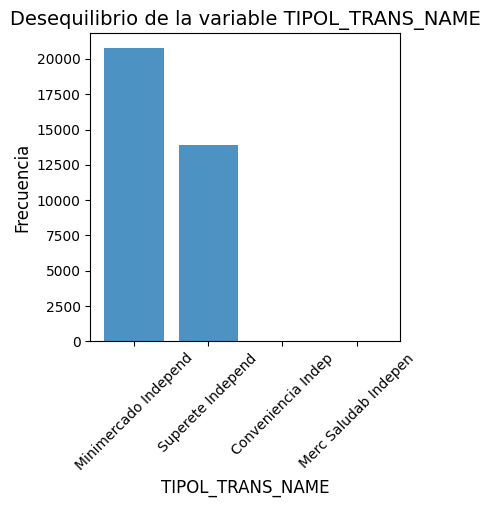

In [140]:
desequilibrio_datos(df,'TIPOL_TRANS_NAME')

Categorías mayoritarias:
Minimercado Indep es la categoría con mayor frecuencia, superando las 20,000 muestras.
Superete Indep ocupa el segundo lugar, con más de 15,000 muestras.
Conveniencia Indep tiene una frecuencia considerablemente menor, posiblemente por debajo de 2,500 muestras.
Merc Saludab Indepen es la categoría menos representada, con una frecuencia cercana o incluso menor a 1,000 muestras.

por lo que Algunas categorías como Minimercado Indep y Superete Indep, pueden corresponder a mercados más amplios y comunes, mientras que las otras representan nichos más pequeños.

Realizar análisis desagregados para las clases Conveniencia Indep y Merc Saludab Indepen para entender mejor su comportamiento y patrones únicos o realizar Implementación de técnicas de balanceo.

#### Sobremuestreo para las caracteristicas de 'Minimercado Independ','Superete Independ'

In [141]:
df_balanceado=equilibrar_datos(df,'TIPOL_TRANS_NAME','Minimercado Independ','Superete Independ')

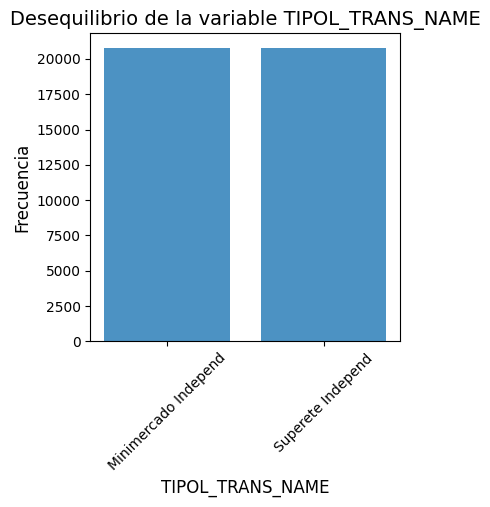

In [142]:
desequilibrio_datos(df_balanceado,'TIPOL_TRANS_NAME')

"Minimercado Independ" y "Superete Independ" tendrán exactamente la misma cantidad de datos.
Las otras dos categorías quedarán fuera del análisis, ya que no fueron incluidas en el filtrado inicial. Las categorías "Conveniencia Indep" y "Merc Saludab Indepen" son tan pequeñas que incluirlas en el modelo sería poco representativo y podría generar ruido.

Ambas clases ahora tienen la misma cantidad de muestras, lo que elimina el sesgo en la frecuencia de las observaciones.
Los modelos tienen más probabilidades de aprender patrones significativos de ambas clases de manera equitativa.

### Prueba de permutación

In [143]:
a = list(df[df['TIPOL_TRANS_NAME'] == 'Minimercado Independ']['QTY'])
b = list(df[df['TIPOL_TRANS_NAME'] == 'Superete Independ']['QTY'])


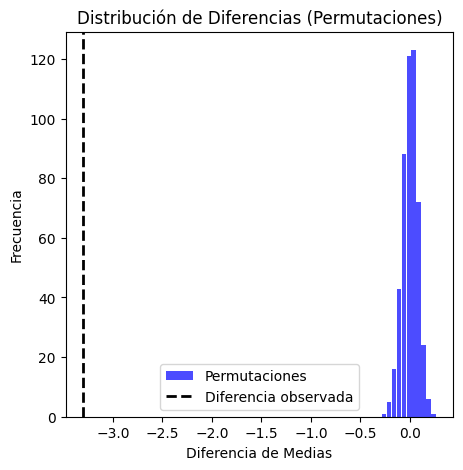

In [144]:
diferencia_permutada,diferencia_observada=grafica_permutaciones(a, b)

Los resultados muestran que la diferencia observada está fuera de la distribución generada por permutaciones bajo la hipótesis nula, reforzando la conclusión de que las diferencias son estadísticamente significativas prueba Mann-Whitney U bidireccional.

Los resultados de la prueba Mann-Whitney U son consistentes con el análisis de permutaciones. Ambos métodos indican que las diferencias entre los grupos no pueden atribuirse al azar.

Este resultado sugiere que el Grupo B tiene un desempeño significativamente superior en términos de tasas de venta. Esta información puede ser utilizada para tomar decisiones estratégicas, como priorizar recursos, estrategias de marketing, o analizar las diferencias operativas y estructurales entre ambos grupos.

### VALOR P 

El valor p es una medida estadística que nos ayuda a evaluar si los resultados observados en un experimento o análisis son consistentes con la hipótesis nula 

Hipótesis nula: Asume que no hay diferencia real entre los grupos o que cualquier diferencia es producto del azar.

Hipótesis alternativa: Plantea que sí hay una diferencia significativa entre los grupos.

Si el valor es muy pequeño < 0.05  significa que los resultados observados son muy improbables bajo la hipotesis nula 

In [ ]:
p_valor = np.mean(np.abs(diferencia_permutada) >= np.abs(diferencia_observada))
print(f"P-valor: {p_valor}")

P-valor: 0.0


resultado 

No hubo ninguna permutación que produjera una diferencia igual o más extrema que la diferencia observada. La probabilidad de que los resultados se deban al azar es prácticamente cero.

Rechazas la hipótesis nula y se concluye que las diferencias entre los grupos son estadísticamente significativas.

conclucion 

Realizar análisis desagregados para "Conveniencia Indep" y "Merc Saludab Indepen" para identificar patrones únicos y explorar su potencial de crecimiento.

Explorar si existen subgrupos dentro de estas categorías que puedan tener patrones de compra diferentes.

Balancear las clases "Minimercado Independ" y "Superete Independ" para garantizar que el modelo no esté sesgado hacia la clase mayoritaria.

Excluir las categorías "Conveniencia Indep" y "Merc Saludab Indepen" si no aportan suficiente información representativa y por ultimo Aplicar técnicas de clustering para identificar patrones emergentes dentro de los grupos existentes y descubrir segmentos nuevos que puedan no haber sido evidentes.